<center>Task 5</center>
<center>Task 2 - Diminos Store - Delivery Time</center>
<center>Data Science and Generative AI Internship</center>
<center>Innomatics Research Labs</center>

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("diminos_data.csv")
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [121]:
df.shape

(15000, 3)

In [122]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [123]:
df.dtypes

order_id               int64
order_placed_at       object
order_delivered_at    object
dtype: object

In [124]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [125]:
df['duration'] = df['order_delivered_at'] - df['order_placed_at']

In [126]:
df

,order_id,order_placed_at,order_delivered_at,duration
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056
...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,0 days 00:15:32.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,0 days 00:16:44.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,0 days 00:15:24.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,0 days 00:15:57.810358


In [127]:
df['duration'] = df['duration'].dt.total_seconds() / 60

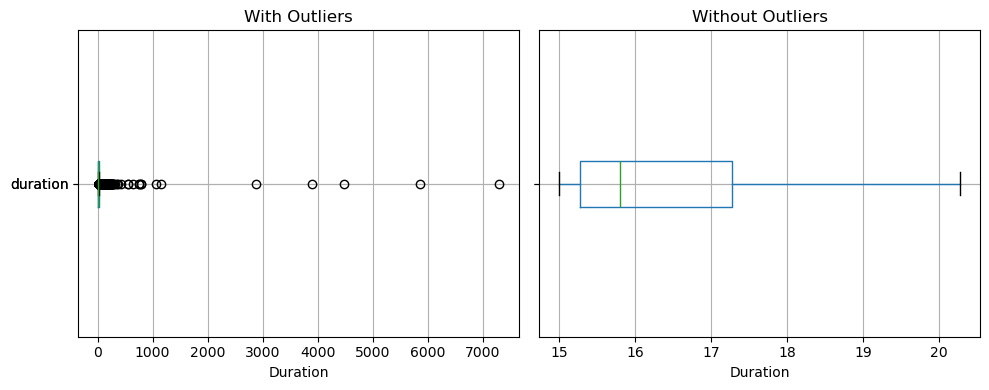

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

df.boxplot(column='duration', vert=False, showfliers=True,ax=ax[0])
ax[0].set_title("With Outliers")
ax[0].set_xlabel("Duration")

df.boxplot(column='duration', vert=False, showfliers=False, ax=ax[1])
ax[1].set_title("Without Outliers")
ax[1].set_xlabel("Duration")

plt.tight_layout()
plt.show()


In [133]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier = df[(df['duration'] < lower) | (df['duration'] > upper)]

peroutlier = (len(outlier) / len(df)) * 100

print(f"Percentage of outliers: {peroutlier:.2f}%")


Percentage of outliers: 11.56%


In [129]:
df['duration'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: duration, dtype: float64

In [130]:
p95 = np.percentile(df['duration'], 95)
p95

27.261043996666658

In [131]:
per31 = (df['duration'] <= 31).mean() * 100
print(f"{per31:.2f}% of orders are completed within 31 minutes")


96.29% of orders are completed within 31 minutes


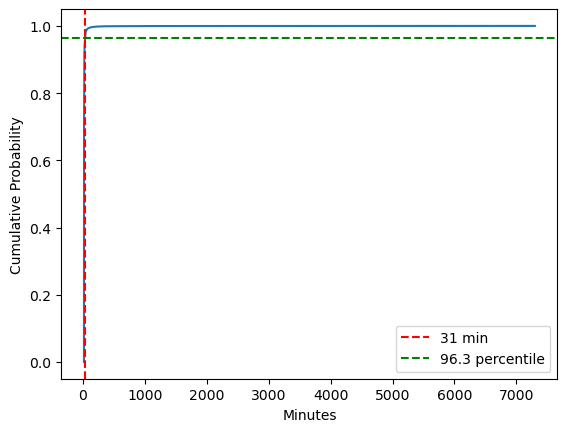

In [132]:
data = np.sort(df['duration'])
cdf = np.arange(1, len(data) + 1) / len(data)

plt.plot(data, cdf)
plt.axvline(31, color='red', linestyle='--', label='31 min')
plt.axhline(per31/100, color='green', linestyle='--', label=f'{per31:.1f} percentile')

plt.xlabel("Minutes")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()


We analyzed the order delivery durations calculated by subtracting the order start time from the order end time. Using a boxplot, we identified the presence of outliers in the data. The mean delivery time is 20.5 minutes, with a median time of 15 minutes and a maximum value of 7,299.9 minutes. Approximately 11.5% of the data points are classified as outliers. The 95th percentile delivery time is 27.26 minutes. According to the company’s service level agreement, 96.29% of orders are completed within 31 minutes, indicating that the vast majority of orders meet the required delivery time threshold.